

## Import Libraries



In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

Clone & Explore dataset

In [ ]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 38.20 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
import os
main_dir = "/content/datasets/Data"
train_dir = os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID-19 (12).jpg', 'COVID19(296).jpg', 'COVID-19 (162).jpg', 'COVID19(545).jpg', 'COVID19(522).jpg', 'COVID-19 (20).jpeg', 'COVID-19 (342).jpg', 'COVID19(145).jpg', 'COVID19(184).jpg', 'COVID19(484).jpg']
['NORMAL(337).jpg', 'NORMAL(758).jpg', 'NORMAL(210).jpg', 'NORMAL(829).jpg', 'NORMAL(182).jpg', 'NORMAL(588).jpg', 'NORMAL(636).jpg', 'NORMAL(830).jpg', 'NORMAL(451).jpg', 'NORMAL(1125).jpg']
['COVID19(278).jpg', 'COVID19(261).jpg', 'COVID19(490).jpg', 'COVID19(415).jpg', 'COVID-19 (709).jpg', 'COVID19(423).jpg', 'COVID19(410).jpg', 'COVID19(350).jpg', 'COVID19(186).jpg', 'COVID19(124).jpg']
['NORMAL(428).jpg', 'NORMAL(1204).jpg', 'NORMAL(877).jpg', 'NORMAL(697).jpg', 'NORMAL(48).jpg', 'NORMAL(234).jpg', 'NORMAL(1463).jpg', 'NORMAL(1136).jpg', 'NORMAL(327).jpg', 'NORMAL(970).jpg']


In [ ]:
print("Total images present in the training set:", len(train_covid_names+train_normal_names))
print("Total images present in the testing set:", len(test_covid_names+test_normal_names))

Total images present in the training set: 1811
Total images present in the testing set: 484


Data Visualization

['/content/datasets/Data/train/COVID19/COVID-19 (12).jpg', '/content/datasets/Data/train/COVID19/COVID19(296).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (162).jpg', '/content/datasets/Data/train/COVID19/COVID19(545).jpg', '/content/datasets/Data/train/COVID19/COVID19(522).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (20).jpeg', '/content/datasets/Data/train/COVID19/COVID-19 (342).jpg', '/content/datasets/Data/train/COVID19/COVID19(145).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(337).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(758).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(210).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(829).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(182).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(588).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(636).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(830).jpg']


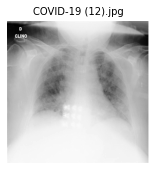

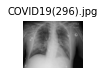

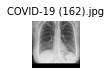

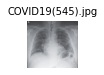

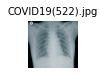

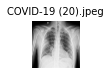

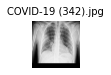

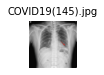

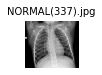

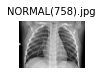

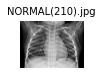

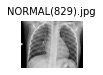

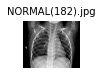

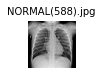

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.image as mpimg
rows = 4
cols = 4
fig = plt.gcf()
fig.set_size_inches(12,12)
covid_pic = [os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]
print(covid_pic)
print(normal_pic)
merged_list = covid_pic+normal_pic
for i , img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
  plt.show()

Data Preprocessing & Augmentation

In [ ]:
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

Compile & Train the Model

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 78s 1s/step - loss: 1.9437 - accuracy: 0.6712 - val_loss: 0.4285 - val_accuracy: 0.8950
Epoch 2/30
46/46 [==============================] - 47s 1s/step - loss: 0.2643 - accuracy: 0.8874 - val_loss: 0.1610 - val_accuracy: 0.9475
Epoch 3/30
46/46 [==============================] - 48s 1s/step - loss: 0.2021 - accuracy: 0.9294 - val_loss: 0.1930 - val_accuracy: 0.9448
Epoch 4/30
46/46 [==============================] - 48s 1s/step - loss: 0.1833 - accuracy: 0.9413 - val_loss: 0.1651 - val_accuracy: 0.9448
Epoch 5/30
46/46 [==============================] - 48s 1s/step - loss: 0.1526 - accuracy: 0.9490 - val_loss: 0.2300 - val_accuracy: 0.9392
Epoch 6/30
46/46 [==============================] - 47s 1s/step - loss: 0.1652 - accuracy: 0.9556 - val_loss: 0.1178 - val_accuracy: 0.9586
Epoch 7/30
46/46 [==============================] - 48s 1s/step - loss: 0.1409 - accuracy: 0.9509 - val_loss: 0.1117 - val_accuracy: 0.9530
Epoch 8/30
46/46 [==

Performance Evaluation

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

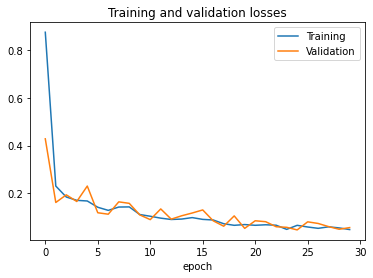

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

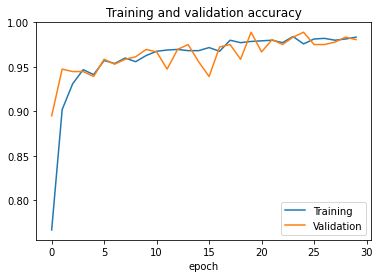

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test loss :{} test acc:{}'.format(test_loss,test_acc))

16/16 [==============================] - 10s 651ms/step - loss: 0.0731 - accuracy: 0.9690
test loss :0.0730881616473198 test acc:0.9690082669258118


Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0:
    print("covid detected")
  else:
    print("your report is normal")

Saving COVID-19 (826).jpg to COVID-19 (826).jpg
COVID-19 (826).jpg
covid detected
